In [1]:
import pandas as pd
import numpy as np
import requests

#import dataset
data=requests.get("https://en.wikipedia.org/wiki/List_of_London_boroughs")
df = pd.read_html(data.text)
df_lond = df[0]
df_lond['Population density']=df_lond['Population (2013 est)[1]']/df_lond['Area (sq mi)']
df_lond["Co-ordinates"]=df_lond["Co-ordinates"].str.split("/", n = 1, expand = True)[1] 
df_lond["lat"]=df_lond["Co-ordinates"].str.split("N", n = 1, expand = True)[0] 
df_lond["lng"]=df_lond["Co-ordinates"].str.split("N", n = 1, expand = True)[1] 

#clean dataset 
df_lond["lat"]=(df_lond["lat"].str.replace("°",""))
df_lond["lat"]=df_lond["lat"].str.replace(" ","")
df_lond["lat"]=df_lond["lat"].str.replace("\ufeff","").astype(float)
df_lond["lng"]=df_lond["lng"].str.replace("°","")
df_lond["lng"]=np.where(df_lond["lng"].str.slice(7,8, 1)=="E",pd.to_numeric(df_lond["lng"].str.slice(0,7, 1)),-1*pd.to_numeric(df_lond["lng"].str.slice(0,7, 1)))

df_lond.head()


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population density,lat,lng
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,﻿51.5607°N 0.1557°E,25,13952.045944,51.5607,0.1557
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,﻿51.6252°N 0.1517°W,31,11020.842042,51.6252,-0.1517
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,23,10123.481608,51.4549,0.1505
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,12,18997.844311,51.5588,-0.2817
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,20,5483.853717,51.4039,0.0198


In [2]:

#import price dataset and clean

df_price = pd.read_excel('UK House price index.xls',sheet_name=2).transpose().reset_index()
new_header = df_price.iloc[0]
df_price = df_price[1:] #take the data less the header row
df_price.columns = new_header
df_price_2019 = df_price.iloc[:,[0,-1]].rename(columns={0: "Borough", 1: "Avg price"})
df_price_2019=df_price_2019.rename(columns={"Unnamed: 0": "Borough", df_price_2019.columns[1]: "Avg price"})

df_price_2019.head()

,Borough,Avg price
1,City of London,897910
2,Barking & Dagenham,305229
3,Barnet,523068
4,Bexley,332290
5,Brent,494761


In [3]:
#merge datasets to get one dataframe
df_lond=df_lond.merge(df_price_2019,on='Borough')
df_lond

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population density,lat,lng,Avg price
0,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,﻿51.6252°N 0.1517°W,31,11020.842042,51.6252,-0.1517,523068
1,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,23,10123.481608,51.4549,0.1505,332290
2,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,12,18997.844311,51.5588,-0.2817,494761
3,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,20,5483.853717,51.4039,0.0198,446116
4,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,﻿51.5290°N 0.1255°W,11,27347.500000,51.5290,-0.1255,793557
5,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,﻿51.3714°N 0.0977°W,19,11156.899132,51.3714,-0.0977,369161
6,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,﻿51.5130°N 0.3089°W,13,15974.533582,51.5130,-0.3089,479648
7,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,﻿51.6538°N 0.0799°W,30,10098.424701,51.6538,-0.0799,386930
8,Hackney,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,﻿51.5450°N 0.0553°W,9,34969.972826,51.5450,-0.0553,566567
9,Haringey,[note 3],NaN,Haringey London Borough Council,Labour,"Civic Centre, High Road",11.42,263386,﻿51.6000°N 0.1119°W,29,23063.572680,51.6000,-0.1119,546294


In [4]:
!conda install --yes -c conda-forge geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'London'
#get london location
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

Solving environment: done

## Package Plan ##

  environment location: /Users/Manisty/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.0                |           py37_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.0-py37_1



conda-4.8.0          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
The geograpical coordinate of London are 51.5073219, -0.1276474.


In [47]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# create map of london boroughs
map_london= folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df_lond['lat'], df_lond['lng'], df_lond['Borough'], df_lond['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

Solving environment: done

# All requested packages already installed.



In [6]:
import requests
CLIENT_ID = 'T3HFJIMY0PFZSG0BCBRTUZVB0X1ACHTKTMSLI1EGSBAQ4PSF' # your Foursquare ID
CLIENT_SECRET = 'LHZCLXD2JXJOVLEJRXUOMTUHH1PW2YHNQFJYOD1MVTA1QDM5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                'Venue id',
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
#get venues for each london borough
london_venues = getNearbyVenues(names=df_lond['Borough'],
                                   latitudes=df_lond['lat'],
                                   longitudes=df_lond['lng']
                                  )

Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Hackney
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [8]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue id,Venue Category
0,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,4f673629e4b0777dfed6cc27,Café
1,Barnet,51.6252,-0.1517,Deli at Number 4,51.625583,-0.152886,4f69dc6de4b03edc4c39e8f7,Diner
2,Barnet,51.6252,-0.1517,Diamond Kebabs,51.624550,-0.153290,524ed7d411d29e3a021bb754,Turkish Restaurant
3,Barnet,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,501b7763e4b01e9e716e76eb,Café
4,Bexley,51.4549,0.1505,Zizzi,51.455929,0.150555,4e8367d5be7bdd8e4e80dcf7,Italian Restaurant


In [9]:
#merge datasets

london_counts=london_venues.groupby("Neighborhood").count().reset_index().iloc[:,0:2].rename(columns={'Neighborhood Latitude': 'Number'})
london_info=london_counts.merge(df_lond,left_on="Neighborhood",right_on="Borough")
london_info.head()

,Neighborhood,Number,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Population density,lat,lng,Avg price
0,Barnet,4,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,﻿51.6252°N 0.1517°W,31,11020.842042,51.6252,-0.1517,523068
1,Bexley,12,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,23,10123.481608,51.4549,0.1505,332290
2,Brent,34,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,12,18997.844311,51.5588,-0.2817,494761
3,Bromley,35,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,20,5483.853717,51.4039,0.0198,446116
4,Camden,52,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,﻿51.5290°N 0.1255°W,11,27347.500000,51.5290,-0.1255,793557


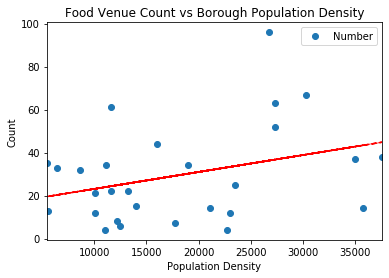

In [30]:
import matplotlib.pyplot as plt
london_info.plot(x='Population density', y='Number', style='o')  
plt.title('Food Venue Count vs Borough Population Density')  
plt.xlabel('Population Density')  
plt.ylabel('Count')  

z = np.polyfit(london_info['Population density'], london_info['Number'], 1)
p = np.poly1d(z)
plt.plot(london_info['Population density'],p(london_info['Population density']),"r--")
plt.show()



In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
X=london_info["Population density"].values.reshape(-1,1)
Y=london_info["Number"].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(X, Y)

y_pred=regressor.predict(X)

r2_score(Y, y_pred)


0.11152659026429901

In [12]:
def getVenueslikes(venue_id):
    
    venues_list=[]
    for venue in venue_id:
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}'.format(
            venue,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION 
           )
            
        # make the GET request
        results = requests.get(url).json()["response"]["likes"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            venue,
            results['count'])for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Venue id','Likes']
    
    return(nearby_venues)

In [13]:
d=getVenueslikes(london_venues["Venue id"])


In [14]:
venue_likes=d.merge(london_venues,on='Venue id').iloc[:,[0,1,2,3]]
venue_likes

,Venue id,Likes,Neighborhood,Neighborhood Latitude
0,4f673629e4b0777dfed6cc27,1,Barnet,51.6252
1,4f673629e4b0777dfed6cc27,1,Barnet,51.6252
2,4f673629e4b0777dfed6cc27,1,Barnet,51.6252
3,4f69dc6de4b03edc4c39e8f7,0,Barnet,51.6252
4,524ed7d411d29e3a021bb754,0,Barnet,51.6252
...,...,...,...,...
2315,5aa1345ba92d981167b60b1d,4,Westminster,51.4973
2316,5aa1345ba92d981167b60b1d,4,Westminster,51.4973
2317,4bb34cf6715eef3b6f2086bb,1,Westminster,51.4973
2318,4bb34cf6715eef3b6f2086bb,1,Westminster,51.4973


In [15]:
venue_likes_grouped = venue_likes.groupby("Neighborhood").sum()
venue_likes_grouped_info=venue_likes_grouped.merge(df_lond,left_on="Neighborhood",right_on="Borough").iloc[:,[0,2,-1,-2,-3,-4]]
venue_likes_grouped_info

,Likes,Borough,Avg price,lng,lat,Population density
0,3,Barnet,523068,-0.1517,51.6252,11020.842042
1,144,Bexley,332290,0.1505,51.4549,10123.481608
2,1395,Brent,494761,-0.2817,51.5588,18997.844311
3,810,Bromley,446116,0.0198,51.4039,5483.853717
4,16689,Camden,793557,-0.1255,51.5290,27347.500000
5,1341,Croydon,369161,-0.0977,51.3714,11156.899132
6,2655,Ealing,479648,-0.3089,51.5130,15974.533582
7,435,Enfield,386930,-0.0799,51.6538,10098.424701
8,4593,Hackney,566567,-0.0553,51.5450,34969.972826
9,374,Haringey,546294,-0.1119,51.6000,23063.572680


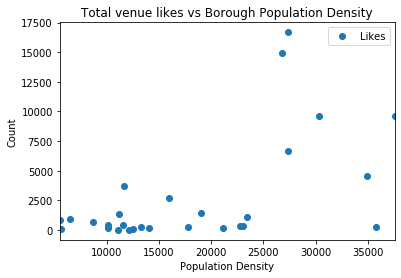

In [31]:
venue_likes_grouped_info.plot(x='Population density', y='Likes', style='o')  
plt.title('Total venue likes vs Borough Population Density')  
plt.xlabel('Population Density')  
plt.ylabel('Count')  
plt.show()

In [17]:
from scipy import stats

X_2=venue_likes_grouped_info["Population density"].values.reshape(-1,1)
Y_2=venue_likes_grouped_info["Likes"].values.reshape(-1,1)

regressor2 = LinearRegression()  
regressor2.fit(X_2, Y_2)

y_pred2=regressor2.predict(X_2)

r2_score(Y_2, y_pred2)


0.3235399039894933

In [35]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(7):
    
    poly = PolynomialFeatures(i)

    X_p=poly.fit_transform(X_2)
    Y_p= poly.fit_transform(Y_2)

    regressorpoly = LinearRegression()  
    regressorpoly.fit(X_p, Y_2)

    y_pred_p=regressorpoly.predict(X_p)
    
    print(i,r2_score(Y_2,y_pred_p))



0 0.0
1 0.3235399039894933
2 0.3235400702421294
3 0.41969550837926084
4 0.46517254058849167
5 0.45342332906452343
6 0.4302161242651724


In [37]:
poly = PolynomialFeatures(4)
X_p=poly.fit_transform(X_2)
Y_p= poly.fit_transform(Y_2)

regressorpoly = LinearRegression()  
regressorpoly.fit(X_p, Y_2)

y_pred_p=regressorpoly.predict(X_p)

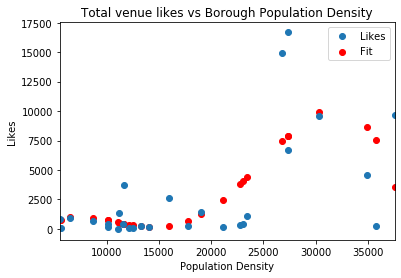

In [41]:
venue_likes_grouped_info.plot(x='Population density', y='Likes', style='o')  
plt.title('Total venue likes vs Borough Population Density')  
plt.xlabel('Population Density')  
plt.ylabel('Likes')  

plt.scatter(X_2, y_pred_p,color='red',label='Fit')
plt.legend()
plt.show()

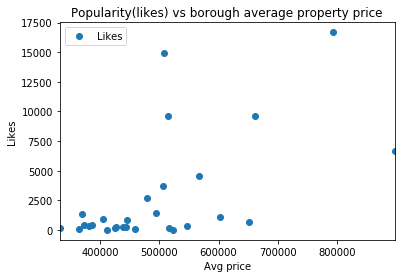

In [21]:
venue_likes_grouped_info.plot(x='Avg price', y='Likes', style='o')  
plt.title('Popularity(likes) vs borough average property price')  
plt.xlabel('Avg price')  
plt.ylabel('Likes')  
plt.show()

In [22]:
X_3=venue_likes_grouped_info["Avg price"].values.reshape(-1,1)
Y_3=venue_likes_grouped_info["Likes"].values.reshape(-1,1)

regressor3 = LinearRegression()  
regressor3.fit(X_3, Y_3)

y_pred3=regressor3.predict(X_3)

r2_score(Y_3, y_pred3)

0.35362198546965995

In [42]:
for i in range(15):
    
    poly = PolynomialFeatures(i)

    X_p=poly.fit_transform(X_3)
    Y_p= poly.fit_transform(Y_3)

    regressorpoly = LinearRegression()  
    regressorpoly.fit(X_p, Y_3)

    y_pred_p=regressorpoly.predict(X_p)
    
    print(i, r2_score(Y_3,y_pred_p))



0 0.0
1 0.35362198546965984
2 0.35487771049293537
3 0.38399383627366535
4 0.39706200852530593
5 0.4115021852965286
6 0.4254864670554528
7 0.43739556612446595
8 0.44627884473978774
9 0.4519521927971014
10 0.45479710344036484
11 0.45546935927725263
12 0.4546670338327883
13 0.4529987722687263
14 0.4509333741686924


In [24]:
poly = PolynomialFeatures(10)
X_p=poly.fit_transform(X_3)
Y_p= poly.fit_transform(Y_3)

regressorpoly = LinearRegression()  
regressorpoly.fit(X_p, Y_3)

y_pred_p=regressorpoly.predict(X_p)

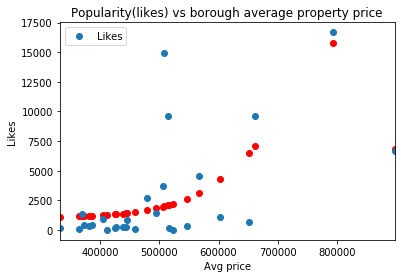

In [25]:
venue_likes_grouped_info.plot(x='Avg price', y='Likes', style='o')  
plt.title('Popularity(likes) vs borough average property price')  
plt.xlabel('Avg price')  
plt.ylabel('Likes')  
plt.scatter(X_3, y_pred_p,color='red')
plt.show()

In [26]:
venue_likes_grouped_info['Profit']=(venue_likes_grouped_info['Likes']-venue_likes_grouped_info['Avg price'])/venue_likes_grouped_info['Avg price']
venue_likes_grouped_info.head()

,Likes,Borough,Avg price,lng,lat,Population density,Profit
0,3,Barnet,523068,-0.1517,51.6252,11020.842042,-0.999994
1,144,Bexley,332290,0.1505,51.4549,10123.481608,-0.999567
2,1395,Brent,494761,-0.2817,51.5588,18997.844311,-0.99718
3,810,Bromley,446116,0.0198,51.4039,5483.853717,-0.998184
4,16689,Camden,793557,-0.1255,51.5290,27347.500000,-0.978969


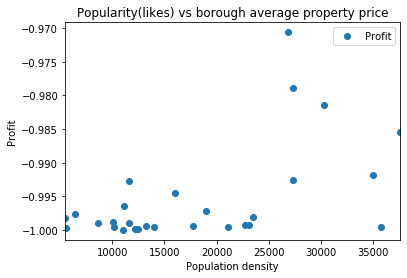

In [27]:
venue_likes_grouped_info.plot(x='Population density', y='Profit', style='o')  
plt.title('Popularity(likes) vs borough average property price')  
plt.xlabel('Population density')  
plt.ylabel('Profit')  

plt.show()

In [28]:
X_4=venue_likes_grouped_info["Population density"].values.reshape(-1,1)
Y_4=venue_likes_grouped_info["Profit"].values.reshape(-1,1)

regressor4 = LinearRegression()  
regressor4.fit(X_4, Y_4)

y_pred4=regressor4.predict(X_4)

r2_score(Y_4, y_pred4)

0.29173888731040853

In [43]:
for i in range(15):
    
    poly = PolynomialFeatures(i)

    X_p=poly.fit_transform(X_4)
    Y_p= poly.fit_transform(Y_4)

    regressorpoly = LinearRegression()  
    regressorpoly.fit(X_p, Y_4)

    y_pred_p=regressorpoly.predict(X_p)
    
    print(i,r2_score(Y_4,y_pred_p))



0 0.0
1 0.29173888731040853
2 0.2917410480183026
3 0.3818276482824944
4 0.4366257006614992
5 0.4212140829759763
6 0.40139865978198375
7 0.4083660393349581
8 0.4496492370331827
9 0.5095651282506903
10 0.5691081017733624
11 0.6167370921203034
12 0.6484479918854058
13 0.6645431114658945
14 0.6670459814480094


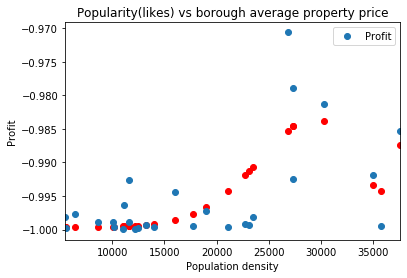

In [44]:
poly = PolynomialFeatures(10)

X_p=poly.fit_transform(X_4)
Y_p= poly.fit_transform(Y_4)

regressorpoly = LinearRegression()  
regressorpoly.fit(X_p, Y_4)
y_pred_p=regressorpoly.predict(X_p)

venue_likes_grouped_info.plot(x='Population density', y='Profit', style='o')  
plt.title('Popularity(likes) vs borough average property price')  
plt.xlabel('Population density')  
plt.ylabel('Profit')  
plt.scatter(X_4, y_pred_p,color='red')

plt.show()